In [388]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [389]:
import numpy as np
import pandas as pd
import time
import gc; gc.enable()
import time
import sys

pd.options.display.float_format = "{:.2f}".format
np.set_printoptions(precision=4)

import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append('modules')

from shared_functions import *

import pickle
from datetime import datetime

In [393]:
def load_results(file_name):
    data = None
    with open(file_name, 'rb') as f:
        # The protocol version used is detected automatically, so we do not
        # have to specify it.
        data = pickle.load(f)
    return data

def filter_top_model_results(top_models, all_model_results):
    plot_data = list()
    for idx, row in top_models.iterrows():
        #print("row.label: " + row.label + ',' + row.classifier + ',' + row.sampling_method)
        for res in all_model_results:       
            for alg_results in res:
                if alg_results[0] == row.label and alg_results[1] == row.classifier and alg_results[2] == row.sampling_method:
                    #print(alg_results)
                    label, model_name, sampling_method, _, tpr, fpr, roc_auc, precision, recall, prc_auc = alg_results

                    plot_data.append(("{} :: {}".format(model_name, sampling_method), tpr, fpr, roc_auc, precision, recall, prc_auc))
    return plot_data

def rebuild_results(res):
    ## Gather all the metrics
    temp_metrics = pd.DataFrame()
    temp_results = list()
    for i in range(0, len(res)):
        temp_metrics = pd.concat([temp_metrics, res[i][1]])
        temp_results.append(res[i][2]) 
    
    return temp_metrics, temp_results

In [ ]:
asklearn = load_results('Asklearn_Default_Undersample.pickle')

In [ ]:
manualrdm = load_results('Manual_RdmSearch_2019-08-05.pickle')

In [ ]:
manualgrid = load_results('Manual_GridSearch_2019-08-05.pickle')

In [ ]:
Manual_GridSearch_2019-08-10.pickle
Manual_RdmSearch_2019-08-10.pickle

DFS_Default_2019-08-10.pickle

In [295]:
measurements = ['classifier', 'sampling_method', \
                #'fp', 'fn',\
                'balanced_accuracy', 'recall', 'precision', \
                 #'f1_score',\
                'train_time', 'aucroc', 'auprc',\
                'model_churn_cost']

measurements_alias = ['classifier', 'sampling', \
                      'bal_acc', 'recall', 'precision',\
                      # 'f1',\
                      'train_time', 'auroc', 'auprc',\
                      'churn_cost']

## Approach 1.1 - Churn BasicData + Default Hyper

In [359]:
## First Experiment:
## Approach 1.1 - Churn BasicData + Default Hyper
exp1_1 = load_results('/home/dissertation/code/RESULTS_FINAL/Basic_DefaultHyper_2019-08-12.pickle')
exp_metrics, exp_results = rebuild_results(exp1_1)

#exp_metrics = exp_metrics[(exp_metrics.recall > 0) & (exp_metrics.recall < 1)]

In [164]:
#exp_metrics[['classifier', 'sampling_method','accuracy']].groupby(['sampling_method']).count()

In [402]:
measure_by = ['balanced_accuracy', 'recall', 'model_churn_cost']
measure_by_sort = [False, False, True]

# measure_by = ['balanced_accuracy']
# measure_by_sort = [False]

# measure_by = ['model_churn_cost']
# measure_by_sort = [True]

# measure_by = ['f1_score']
# measure_by_sort = [False]

### The best 5 performing models by approach as measured by .... 

In [405]:
print("Getting results for {} / ordered ascending? {}".format(measure_by, measure_by_sort))
top_results = exp_metrics\
                .sort_values(measure_by, ascending=measure_by_sort)
top_results = top_results[measurements]
top_results['classifier'] = top_results['classifier'].apply(lambda v: str(v).replace('Classifier', ''))

top_results.head(5)

Getting results for ['balanced_accuracy', 'recall', 'model_churn_cost'] / ordered ascending? [False, False, True]


,classifier,sampling_method,balanced_accuracy,recall,precision,train_time,aucroc,auprc,model_churn_cost
0,XGB,ROS 1:1,0.81,0.74,0.38,160.65,0.88,0.62,7752900
0,XGB,RUS 1:1,0.81,0.74,0.38,14.89,0.88,0.62,7794600
0,XGB,ROS 3:2,0.80,0.71,0.41,129.31,0.88,0.62,7634000
0,XGB,SMOTE_NC,0.80,0.71,0.40,161.53,0.87,0.60,7752100
0,RandomForest,RUS 1:1,0.80,0.76,0.32,2.92,0.87,0.55,8656700


In [407]:
### The lowest 5 performing models by approach as measured by .... 
print("Getting results for {} / ordered ascending? {}".format(measure_by, [not f for f in measure_by_sort]))
top_results = exp_metrics\
                .sort_values(measure_by, ascending=[not f for f in measure_by_sort])
top_results = top_results[measurements]
top_results['classifier'] = top_results['classifier'].apply(lambda v: str(v).replace('Classifier', ''))
top_results.head(5)

Getting results for ['balanced_accuracy', 'recall', 'model_churn_cost'] / ordered ascending? [True, True, False]


,classifier,sampling_method,balanced_accuracy,recall,precision,train_time,aucroc,auprc,model_churn_cost
0,LogisticRegression,None,0.50,0.00,0.00,4.71,0.72,0.45,12030500
0,MLP,None,0.50,0.00,0.00,620.33,0.50,0.55,12030500
0,MLP,RUS 1:1,0.50,0.00,0.00,381.71,0.50,0.55,12030500
0,LogisticRegression,ROS 3:1,0.50,0.00,0.00,5.03,0.72,0.45,12030500
0,MLP,ROS 3:1,0.50,0.00,0.00,1422.61,0.50,0.55,12030500


In [409]:
temp = top_results.head(5)
temp.columns = measurements_alias
print(temp.to_latex(index=False))

\begin{tabular}{llrrrrrrr}
\toprule
         classifier & sampling &  bal\_acc &  recall &  precision &  train\_time &  auroc &  auprc &  churn\_cost \\
\midrule
 LogisticRegression &     None &     0.50 &    0.00 &       0.00 &        4.71 &   0.72 &   0.45 &    12030500 \\
                MLP &     None &     0.50 &    0.00 &       0.00 &      620.33 &   0.50 &   0.55 &    12030500 \\
                MLP &  RUS 1:1 &     0.50 &    0.00 &       0.00 &      381.71 &   0.50 &   0.55 &    12030500 \\
 LogisticRegression &  ROS 3:1 &     0.50 &    0.00 &       0.00 &        5.03 &   0.72 &   0.45 &    12030500 \\
                MLP &  ROS 3:1 &     0.50 &    0.00 &       0.00 &     1422.61 &   0.50 &   0.55 &    12030500 \\
\bottomrule
\end{tabular}



### Summary performance statistics of classifiers over all sampling techniques

In [413]:
## Excludes LR and MLP as those produce bad classifiers

stats_summary = {'best':max,
                 'median':'median', 
                 'iqr':lambda x: np.percentile(x, 75, interpolation='higher') - np.percentile(x, 25, interpolation='lower'),
                # 'range':lambda x: max(x) - min(x)
                }

exp_metrics[~exp_metrics.recall.isin([0.0, 1.0])]\
        .groupby(['sampling_method'])\
        .agg({
             'balanced_accuracy':stats_summary,
             'recall':stats_summary,
             'precision':stats_summary,
             'model_churn_cost':{'best':min},
             #'aucroc':stats_summary,
             #'auprc':stats_summary,
             #'train_time':stats_summary,
             })\
        .reset_index()\
        .sort_values(('balanced_accuracy', 'best'), ascending=False)\
       # .to_latex(index=False)

/home/anaconda/envs/py373/lib/python3.7/site-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


sampling_method balanced_accuracy             recall             precision  \
                               best median  iqr   best median  iqr      best   
1         ROS 1:1              0.81   0.74 0.04   0.74   0.55 0.07      0.44   
5         RUS 1:1              0.81   0.77 0.04   0.76   0.74 0.13      0.42   
4         ROS 3:2              0.80   0.74 0.04   0.71   0.52 0.10      0.51   
6        SMOTE_NC              0.80   0.74 0.04   0.71   0.56 0.08      0.42   
2         ROS 2:1              0.79   0.75 0.07   0.65   0.56 0.15      0.54   
3         ROS 3:1              0.77   0.74 0.05   0.60   0.54 0.10      0.57   
0            None              0.73   0.70 0.05   0.53   0.44 0.15      0.83   

              model_churn_cost  
  median  iqr             best  
1   0.39 0.03          7752900  
5   0.32 0.10          7794600  
4   0.42 0.03          7634000  
6   0.38 0.03          7752100  
2   0.47 0.11          7471300  
3   0.51 0.13          7477200  
0   0.60 0.37          8404900

In [414]:
#print('\\begin{tabular}{lrrrrrrrrrr}\n\\toprule\n         classifier & \\multicolumn{3}{l}{recall} & \\multicolumn{3}{l}{balanced\\_accuracy} & \\multicolumn{3}{l}{precision} & model\\_churn\\_cost \\\\\n                    &   best & median &  iqr &              best & median &  iqr &      best & median &  iqr &             best \\\\\n\\midrule\n                XGB &   0.74 &   0.71 & 0.14 &              0.81 &   0.80 & 0.04 &      0.83 &   0.41 & 0.16 &          7471300 \\\\\n       RandomForest &   0.76 &   0.52 & 0.05 &              0.80 &   0.74 & 0.01 &      0.69 &   0.51 & 0.14 &          8141100 \\\\\n         GaussianNB &   0.64 &   0.60 & 0.03 &              0.77 &   0.76 & 0.01 &      0.46 &   0.42 & 0.02 &          8216700 \\\\\n       DecisionTree &   0.74 &   0.51 & 0.06 &              0.77 &   0.72 & 0.01 &      0.52 &   0.45 & 0.11 &          8574600 \\\\\n LogisticRegression &   0.55 &   0.37 & 0.55 &              0.68 &   0.61 & 0.18 &      0.23 &   0.20 & 0.23 &         11122700 \\\\\n                MLP &   1.00 &   0.00 & 1.00 &              0.50 &   0.50 & 0.00 &      0.09 &   0.00 & 0.09 &         12030500 \\\\\n\\bottomrule\n\\end{tabular}\n')

### The best performing sampling methods by classifier as measured by .... 

In [416]:
print("Getting results for {} / ordered ascending? {}".format(measure_by, measure_by_sort))
top_results = exp_metrics.sort_values(measure_by, ascending=measure_by_sort).groupby('classifier').head(1)
top_results = top_results[measurements]
top_results['classifier'] = top_results['classifier'].apply(lambda v: str(v).replace('Classifier', ''))
top_results

Getting results for ['balanced_accuracy', 'recall', 'model_churn_cost'] / ordered ascending? [False, False, True]


,classifier,sampling_method,balanced_accuracy,recall,precision,train_time,aucroc,auprc,model_churn_cost
0,XGB,ROS 1:1,0.81,0.74,0.38,160.65,0.88,0.62,7752900
0,RandomForest,RUS 1:1,0.80,0.76,0.32,2.92,0.87,0.55,8656700
0,DecisionTree,RUS 1:1,0.77,0.74,0.28,2.56,0.76,0.49,9502600
0,GaussianNB,SMOTE_NC,0.77,0.64,0.38,6.52,0.81,0.55,8412300
0,LogisticRegression,RUS 1:1,0.68,0.55,0.23,2.23,0.74,0.38,11122700
0,MLP,ROS 1:1,0.50,1.00,0.09,1555.64,0.50,0.55,25748700


### The best performing models by sampling method as measured by .... 

In [419]:
print("Getting results for {} / ordered ascending? {}".format(measure_by, measure_by_sort))
top_results = exp_metrics[(exp_metrics.recall > 0) & (exp_metrics.recall < 1)]\
                    .sort_values(measure_by, ascending=measure_by_sort).groupby('sampling_method').head(1)
top_results = top_results[measurements]
top_results.sort_values('balanced_accuracy', ascending=False)

Getting results for ['balanced_accuracy', 'recall', 'model_churn_cost'] / ordered ascending? [False, False, True]


,classifier,sampling_method,balanced_accuracy,recall,precision,train_time,aucroc,auprc,model_churn_cost
0,XGBClassifier,ROS 1:1,0.81,0.74,0.38,160.65,0.88,0.62,7752900
0,XGBClassifier,RUS 1:1,0.81,0.74,0.38,14.89,0.88,0.62,7794600
0,XGBClassifier,ROS 3:2,0.80,0.71,0.41,129.31,0.88,0.62,7634000
0,XGBClassifier,SMOTE_NC,0.80,0.71,0.40,161.53,0.87,0.60,7752100
0,XGBClassifier,ROS 2:1,0.79,0.65,0.48,114.12,0.88,0.63,7471300
0,XGBClassifier,ROS 3:1,0.77,0.60,0.55,100.30,0.88,0.63,7477200
0,GaussianNB,None,0.73,0.53,0.46,4.79,0.82,0.54,8447500


### Classifier train time distribution by sampling method

Text(0.5, 0, 'Sampling Method')

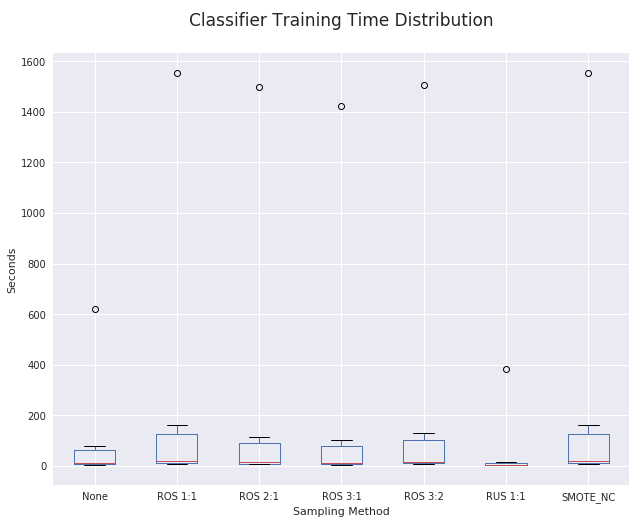

In [420]:
fig, ax = plt.subplots(figsize=(10,8))
plt.ylabel('Seconds')
exp_metrics.boxplot(column='train_time', by='sampling_method', ax=ax)
plt.title('Classifier Training Time Distribution\n', size=17)
plt.suptitle(' ')
plt.xlabel('Sampling Method')

### For this approach plot the best models by classifier

Getting results for ['balanced_accuracy', 'recall', 'model_churn_cost'] / ordered ascending? [False, False, True]


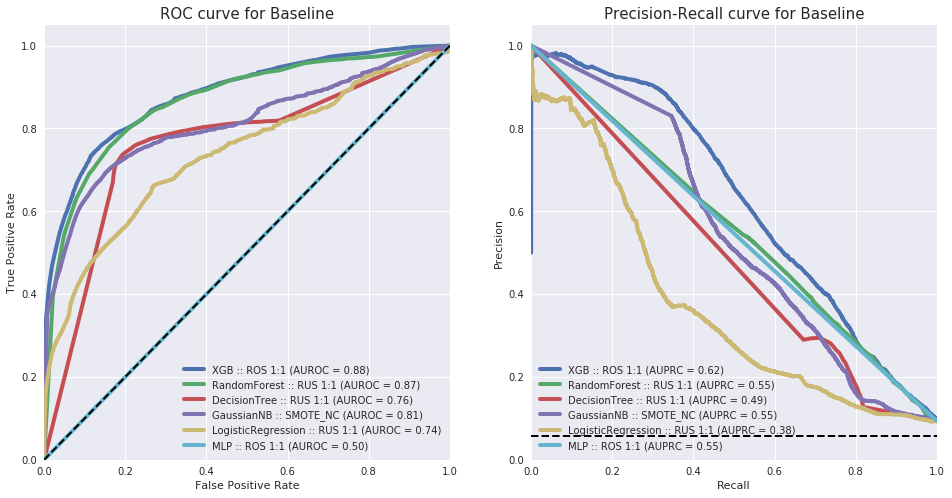

In [421]:
print("Getting results for {} / ordered ascending? {}".format(measure_by, measure_by_sort))
plot_results = exp_metrics.sort_values(measure_by, ascending=measure_by_sort).groupby('classifier').head(1)
plot_data = filter_top_model_results(plot_results, exp_results)
plot_roc_prc(plot_data, 'Baseline')

In [255]:
from scipy import stats
import scikit_posthocs as sp

xgb = plot_data[0][-2]
rf = plot_data[1][-2]
dt = plot_data[2][-2]
gnb = plot_data[3][-2]
lr = plot_data[4][-2]
mlp = plot_data[5][-2]

data = [xgb, rf, dt, gnb, lr, mlp]

stats.kruskal(*data)

KruskalResult(statistic=23362.838566202063, pvalue=0.0)

In [252]:
sp.posthoc_conover(data)

,1,2,3,4,5,6
1,-1.00,0.00,0.00,0.00,0.00,0.89
2,0.00,-1.00,0.00,0.00,0.00,0.39
3,0.00,0.00,-1.00,0.22,0.00,0.58
4,0.00,0.00,0.22,-1.00,0.00,0.65
5,0.00,0.00,0.00,0.00,-1.00,0.67
6,0.89,0.39,0.58,0.65,0.67,-1.00


In [ ]:
#all_metrics[all_metrics.recall < 1.0].sort_values(['recall'], ascending=[False])

In [ ]:
#all_metrics.sort_values(['recall','precision'], ascending=[False, False])

In [ ]:
print(top_results.to_latex(index=False)) # doctest: +NORMALIZE_WHITESPACE

In [44]:
import scipy.stats as ss
import statsmodels.api as sa
import scikit_posthocs as sp
import statsmodels.formula.api as sfa

df = sa.datasets.get_rdataset('iris').data
data = [df.loc[ids, 'Sepal.Width'].values for ids in df.groupby('Species').groups.values()]

In [46]:
H, p = ss.kruskal(*data)
print(H, p)

63.571146104163795 1.5692820940316782e-14


In [47]:
sp.posthoc_conover(df, val_col='Sepal.Width', group_col='Species', p_adjust = 'holm')

,setosa,versicolor,virginica
setosa,-1.00,0.00,0.00
versicolor,0.00,-1.00,0.00
virginica,0.00,0.00,-1.00


In [55]:
df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species']

In [56]:
lm = sfa.ols('Sepal_Width ~ C(Species)', data=df).fit()
anova = sa.stats.anova_lm(lm)
print(anova)

               df  sum_sq  mean_sq     F  PR(>F)
C(Species)   2.00   11.34     5.67 49.16    0.00
Residual   147.00   16.96     0.12   nan     nan


In [59]:
sp.posthoc_ttest(df, val_col='Sepal_Width', group_col='Species', p_adjust='holm')

,setosa,versicolor,virginica
setosa,-1.00,0.00,0.00
versicolor,0.00,-1.00,0.00
virginica,0.00,0.00,-1.00
